<a href="https://colab.research.google.com/github/AyushBhatt99/Short-term-Load-Forecasting/blob/main/BTP_LSTM_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_excel('/content/load11[1].xlsx')

In [ ]:
print(df.columns)


Index(['datetime', 'temp_2M', 'humidity_2M', 'precipitation_2M',
       'wind_speed_2M', 'holiday', 'net_demand'],
      dtype='object')


In [ ]:
df
df.set_index(['datetime'],inplace=True)
df_og=df
df.drop(df.iloc[:,1:],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df['Load (kW)']=scaler.fit_transform(df)

In [ ]:
# df = pd.read_csv(csv_path)
df
# time=df['Time']

,temp_2M,Load (kW)
datetime,,
1/3/2015 1:00,25.865259,0.240921
1/3/2015 2:00,25.899255,0.243734
1/3/2015 3:00,25.937280,0.246880
1/3/2015 4:00,25.957544,0.248557
1/3/2015 5:00,25.973840,0.249905
...,...,...
6/26/2020 20:00,27.246545,0.355208
6/26/2020 21:00,27.099573,0.343048
6/26/2020 22:00,26.971155,0.332423


<Axes: xlabel='datetime'>

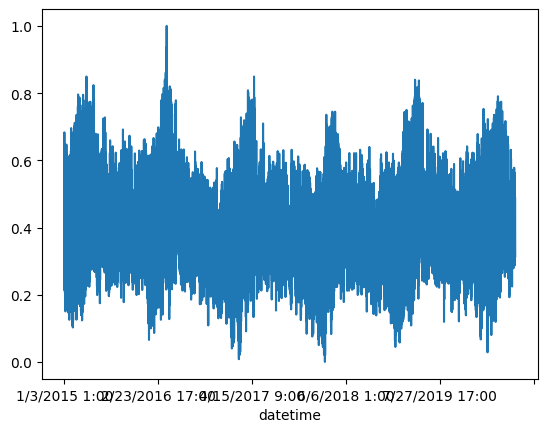

In [ ]:
temp = df['Load (kW)']
temp.plot()

In [ ]:
temp

datetime
1/3/2015 1:00      0.240921
1/3/2015 2:00      0.243734
1/3/2015 3:00      0.246880
1/3/2015 4:00      0.248557
1/3/2015 5:00      0.249905
                     ...   
6/26/2020 20:00    0.355208
6/26/2020 21:00    0.343048
6/26/2020 22:00    0.332423
6/26/2020 23:00    0.323845
6/27/2020 0:00     0.314152
Name: Load (kW), Length: 48048, dtype: float64

In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((48043, 5, 1), (48043,))

In [ ]:
X_train1, y_train1 = X1[:25000], y1[:25000]
X_val1, y_val1 = X1[25000:30000], y1[25000:30000]
X_test1, y_test1 = X1[30000:], y1[30000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((25000, 5, 1), (25000,), (5000, 5, 1), (5000,), (18043, 5, 1), (18043,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20, callbacks=[cp1])

Epoch 1/20
782/782 [==============================] - 12s 13ms/step - loss: 0.0184 - root_mean_squared_error: 0.1357 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1053
Epoch 2/20
782/782 [==============================] - 9s 12ms/step - loss: 0.0081 - root_mean_squared_error: 0.0902 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0923
Epoch 3/20
782/782 [==============================] - 9s 11ms/step - loss: 0.0048 - root_mean_squared_error: 0.0694 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0560
Epoch 4/20
782/782 [==============================] - 8s 10ms/step - loss: 0.0014 - root_mean_squared_error: 0.0372 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0375
Epoch 5/20
782/782 [==============================] - 9s 12ms/step - loss: 9.4855e-04 - root_mean_squared_error: 0.0308 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0374
Epoch 6/20
782/782 [==============================] - 10s 12ms/step - loss: 8.8531e-04 - root_mean_squared_error: 0.0298 - val_los

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

782/782 [==============================] - 3s 3ms/step


,Train Predictions,Actuals
0,0.259505,0.254895
1,0.266424,0.309283
2,0.351552,0.390581
3,0.460664,0.480464
4,0.561431,0.563721
...,...,...
24995,0.354146,0.350459
24996,0.321470,0.314399
24997,0.282394,0.295287
24998,0.277524,0.280741


In [ ]:
df_train=df.iloc[:25000]
df_val=df.iloc[25000:30000]
df_test=df.iloc[30005:]


In [ ]:
train_results.set_index(df_train.index,inplace=True)
train_results

,Train Predictions,Actuals
datetime,,
1/3/2015 1:00,0.259505,0.254895
1/3/2015 2:00,0.266424,0.309283
1/3/2015 3:00,0.351552,0.390581
1/3/2015 4:00,0.460664,0.480464
1/3/2015 5:00,0.561431,0.563721
...,...,...
11/9/2017 12:00,0.354146,0.350459
11/9/2017 13:00,0.321470,0.314399
11/9/2017 14:00,0.282394,0.295287


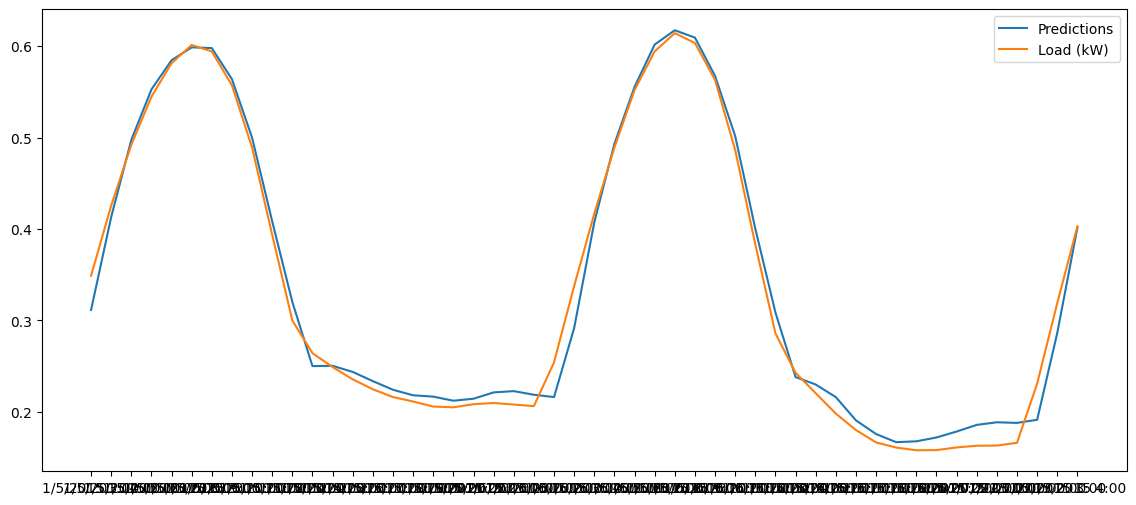

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))

plt.plot(train_results['Train Predictions'][50:100],label='Predictions')
plt.plot(train_results['Actuals'][50:100],label='Load (kW)')
plt.legend()

In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

157/157 [==============================] - 0s 3ms/step


,Val Predictions,Actuals
0,0.257745,0.251473
1,0.245892,0.240543
2,0.238133,0.231670
3,0.232170,0.222544
4,0.224176,0.213866
...,...,...
4995,0.306486,0.302027
4996,0.300482,0.297623
4997,0.297316,0.291795
4998,0.291255,0.287677


In [ ]:
val_results.set_index(df_val.index,inplace=True)


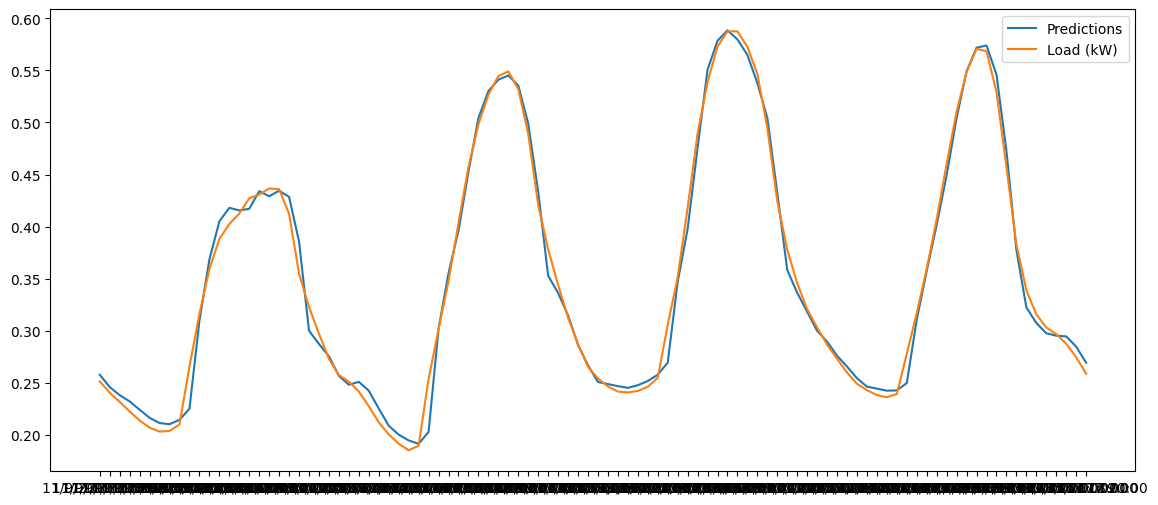

In [ ]:

plt.figure(figsize=(14,6))
plt.plot(val_results['Val Predictions'][:100],label='Predictions')
plt.plot(val_results['Actuals'][:100],label='Load (kW)')
plt.legend()

In [ ]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

564/564 [==============================] - 2s 3ms/step


,Test Predictions,Actuals
0,0.289907,0.297552
1,0.309767,0.344530
2,0.382650,0.380393
3,0.417482,0.417389
4,0.450136,0.454419
...,...,...
18038,0.341105,0.355208
18039,0.341512,0.343048
18040,0.332818,0.332423
18041,0.323550,0.323845


In [ ]:
test_results.set_index(df_test.index,inplace=True)


plt.figure(figsize=(14,6))

plt.plot(test_results['Test Predictions'][:100],label='Predictions')
plt.plot(test_results['Actuals'][:200],label='Load (kW)')
plt.legend()

import numpy as np

plt.figure(figsize=(14,6))
plt.plot(test_results['Test Predictions'][:100], label='Predictions')
plt.plot(test_results['Actuals'][:200], label='Load (kW)')
plt.legend()
plt.xticks(np.arange(0, 201, 25))  # Ticks from 0 to 200 at intervals of 20
plt.show()

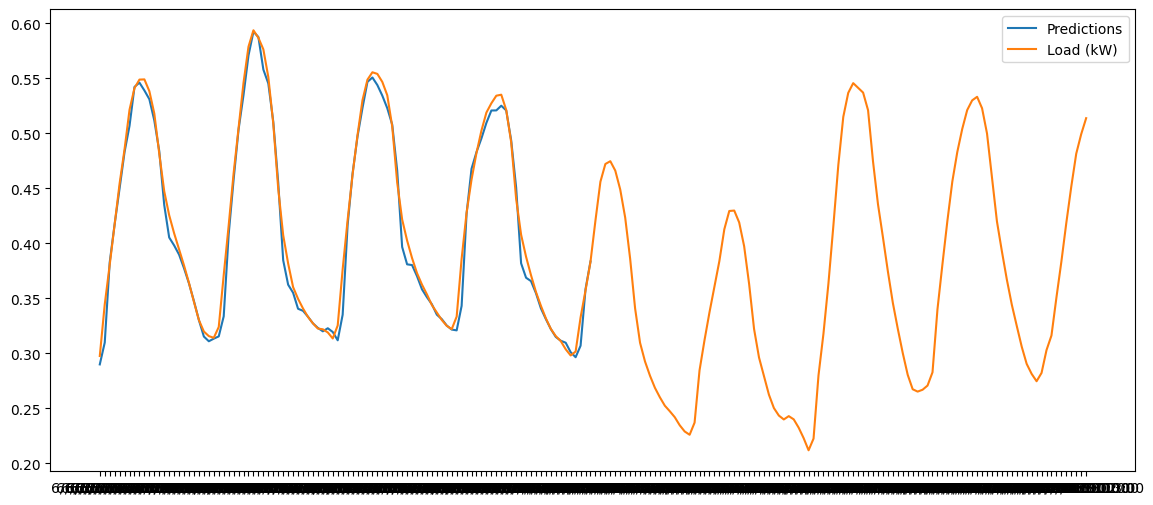

In [ ]:
plt.figure(figsize=(14,6))

plt.plot(test_results['Test Predictions'][:100],label='Predictions')
plt.plot(test_results['Actuals'][:200],label='Load (kW)')
plt.legend()



In [1]:
import numpy as np
import pandas as pd
import requests
from datetime import datetime

# Function to fetch weather data from OpenWeatherMap API
def fetch_weather_data(api_key, city):
    url = f'https://api.openweathermap.org/data/2.5/forecast?units=metric&q={city}&appid={api_key}'
    response = requests.get(url)
    if response.status_code == 200:
        weather_data = response.json()
        return weather_data
    else:
        print('Failed to fetch weather data')
        return None

# Define your API key and city
api_key = '72f08c0b39657cb8f3e52f34c851a4d7'
city = 'Varanasi'  # You can change this to your desired city

# Fetch weather data
weather_data = fetch_weather_data(api_key, city)

if weather_data is not None:
    # Extract information from the first forecast
    first_forecast = weather_data['list'][0]
    datetime_str = first_forecast['dt_txt']
    temperature = first_forecast['main']['temp']
    humidity = first_forecast['main']['humidity']
    precipitation = 0.0597976  # Assuming precipitation data is not available in the response
    wind = first_forecast['weather'][0]['description']
    wind_speed = first_forecast['wind']['speed']

    # Determine if it's a holiday (Sunday or Monday)
    datetime_obj = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')
    day_of_week = datetime_obj.weekday()
    holiday = 1 if day_of_week == 6 or day_of_week == 0 else 0

    # Print the extracted information
    print(f'Date Time: {datetime_str}')
    print(f'Temperature: {temperature}')
    print(f'Humidity: {humidity}')
    print(f'Precipitation: {precipitation}')  # Assuming precipitation data is not available

    print(f'Wind Speed: {wind_speed} ')
    print(f'Holiday: {holiday}')  # Print holiday value
else:
    print('Weather data fetch failed.')


Date Time: 2024-04-23 12:00:00
Temperature: 40.22
Humidity: 17
Precipitation: 0.0597976
Wind Speed: 5.5 
Holiday: 0
